In [32]:
import requests 

city = 'Lucknow'
url = 'http://api.waqi.info/feed/' + city + '/?token='
api_key = '7c3674581d0f0464ba819c896bc39a4f4c702f21'

main_url = url + api_key
r = requests.get(main_url)
data = r.json()['data']
print(data)

{'aqi': 81, 'idx': 13721, 'attributions': [{'url': 'http://cpcb.nic.in/', 'name': 'CPCB - India Central Pollution Control Board', 'logo': 'India-CPCB.png'}, {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}], 'city': {'geo': [26.766433, 80.927299], 'name': 'B R Ambedkar University, Lucknow, India', 'url': 'https://aqicn.org/city/india/lucknow/b-r-ambedkar-university', 'location': ''}, 'dominentpol': 'pm25', 'iaqi': {'co': {'v': 2.9}, 'dew': {'v': 27}, 'h': {'v': 52.425}, 'no2': {'v': 3.1}, 'o3': {'v': 4.1}, 'p': {'v': 999}, 'pm10': {'v': 61}, 'pm25': {'v': 81}, 'so2': {'v': 11.8}, 't': {'v': 35.5}, 'w': {'v': 1.7774999999999999}}, 'time': {'s': '2022-06-26 18:00:00', 'tz': '+05:30', 'v': 1656266400, 'iso': '2022-06-26T18:00:00+05:30'}, 'forecast': {'daily': {'o3': [{'avg': 24, 'day': '2022-06-24', 'max': 43, 'min': 6}, {'avg': 27, 'day': '2022-06-25', 'max': 33, 'min': 21}, {'avg': 20, 'day': '2022-06-26', 'max': 29, 'min': 11}, {'avg': 17, 'day': '2022-06-27', '

In [33]:
aqi = data['aqi']
iaqi = data['iaqi']

del iaqi['p']

for i in iaqi.items():
    print(i[0],':',i[1]['v'])


co : 2.9
dew : 27
h : 52.425
no2 : 3.1
o3 : 4.1
pm10 : 61
pm25 : 81
so2 : 11.8
t : 35.5
w : 1.7774999999999999


In [41]:
dew = iaqi.get('dew','Nil')
no2 = iaqi.get('no2','Nil')
o3 = iaqi.get('o3','Nil')
so2 = iaqi.get('so2','Nil')
pm10 = iaqi.get('pm10','Nil')
pm25 = iaqi.get('pm25','Nil')

print(f'{city} AQI :',aqi,'\n')
print('Individual Air quality')
print('Dew :',dew)
print('no2 :',no2)
print('Ozone :',o3)
print('sulphur :',so2)
print('pm10 :',so2)
print('pm25 :',pm25)


Lucknow AQI : 81 

Individual Air quality
Dew : {'v': 27}
no2 : {'v': 3.1}
Ozone : {'v': 4.1}
sulphur : {'v': 11.8}
pm10 : {'v': 11.8}
pm25 : {'v': 81}


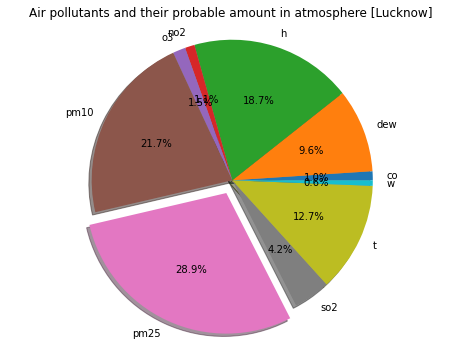

In [42]:
import matplotlib.pyplot as plt

pollutants = [i for i in iaqi]
values = [i['v'] for i in iaqi.values()]


# Exploding the first slice
explode = [0 for i in pollutants]
mx = values.index(max(values))  # explode 1st slice
explode[mx] = 0.1

# Plot a pie chart
plt.figure(figsize=(8,6))
plt.pie(values, labels=pollutants,explode=explode,autopct='%1.1f%%', shadow=True)

plt.title('Air pollutants and their probable amount in atmosphere [Lucknow]')

plt.axis('equal')
plt.show()


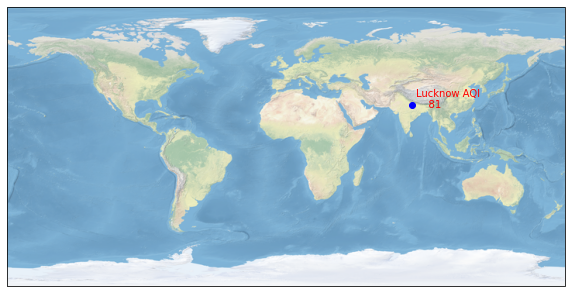

In [43]:
import cartopy.crs as ccrs

geo = data['city']['geo']

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.scatter(geo[1],geo[0],color='blue')
plt.text(geo[1] + 3,geo[0]-2,f'{city} AQI \n    {aqi}',color='red')

plt.show()


In [83]:
import pandas as pd


csv_path = r'C:\Users\Admin\Downloads\gomti-nagar, lucknow, india-air-quality.csv'

df = pd.read_csv(csv_path)
df = df.head(100)
df['date'] = pd.to_datetime(df.date)
dft = df.loc[df['date'] > '2020-03-24']
dft = dft.sort_values(by = 'date')
print(dft)

         date  pm25  pm10   o3  no2  so2   co
87 2022-03-01   122    66   36   27   14   11
88 2022-03-02   134    73   37   25   15   11
89 2022-03-03   140    70   31   18   15   12
90 2022-03-04   124    63   26   20   15   11
91 2022-03-05   115    66   42   17   16   13
..        ...   ...   ...  ...  ...  ...  ...
21 2022-06-22   123    70   26    6    7    5
22 2022-06-23   126    82   36    6    7    5
23 2022-06-24   132    69   27    6    5    4
24 2022-06-25   136    62   27    6    5    4
25 2022-06-26   106                          

[100 rows x 7 columns]


In [65]:
dft.columns

dft= dft.rename(columns = {" pm25": "pm25", 
                         " pm10":"pm10", 
                         " o3": "o3",
                         ' no2' : 'no2',
                         ' so2' : 'so2',
                         ' co' : 'co'})

dft.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

In [64]:
dft.replace(' ', '0', inplace=True)
print(dft)

         date  pm25  pm10   o3  no2  so2   co
87 2022-03-01   122    66   36   27   14   11
88 2022-03-02   134    73   37   25   15   11
89 2022-03-03   140    70   31   18   15   12
90 2022-03-04   124    63   26   20   15   11
91 2022-03-05   115    66   42   17   16   13
..        ...   ...   ...  ...  ...  ...  ...
21 2022-06-22   123    70   26    6    7    5
22 2022-06-23   126    82   36    6    7    5
23 2022-06-24   132    69   27    6    5    4
24 2022-06-25   136    62   27    6    5    4
25 2022-06-26   106     0    0    0    0    0

[100 rows x 7 columns]


In [1]:
import matplotlib.pyplot as plt

dates = df21['date']
pm25 = df21['pm25']
pm25 = [int(i) for i in pm25]

plt.figure(figsize=(20,16))

length = len(dates)

plt.plot(dates,pm25)
plt.title('PM2.5 values in lockdown days')
plt.xlabel('Dates of lockdown')
plt.ylabel('PM2.5 values')
plt.show()

NameError: name 'df21' is not defined

In [2]:
mask = (df['date'] >= '2020-03-05') & (df['date']  < '2020-03-25')
past60 = df.loc[mask]
print(past60)

NameError: name 'df' is not defined